# 📊 Projeto: Análise de Tendências em Anúncios do Mercado Livre
**Objeto de Estudo:** Anúncios de "Pulseira" (Produtos mais vendidos - Top 5 Páginas)

---

### 🔄 Fluxo do Projeto
Este notebook representa a **Etapa 2** do projeto, focada na inteligência de dados. Ele consome a base de dados bruta gerada pelo script de automação `Raspagem.py`.

#### 📂 Estrutura do Processo:
1.  **Coleta (Script Python):** O arquivo `Raspagem.py` acessou o Mercado Livre, navegou pelas páginas de busca e extraiu os títulos brutos dos produtos.
2.  **Ingestão (Neste Arquivo):** Carregamento do arquivo `.csv` gerado anteriormente.
3.  **Pré-processamento (Limpeza):**
    * Remoção de caracteres especiais e pontuação.
    * Normalização para letras minúsculas.
    * Filtragem de *Stopwords* (palavras de conexão sem valor semântico, ex: "de", "com", "e").
4.  **Visualização de Dados:** Geração de gráficos para identificar quais termos tornam um anúncio "vendedor".
5.  **Insights Estratégicos e Conclusões:** Insights principais extraidos da análise dos anúncios das 5 primeiras páginas

## 📥 Ingestão de Dados
**Origem dos Dados:** Script de automação `Raspagem.py`.

Nesta etapa, carregamos o arquivo `.csv` gerado anteriormente. Este arquivo contém a "matéria-prima" bruta: os títulos dos anúncios que raspamos das 5 primeiras páginas do Mercado Livre.

In [43]:
# Manipular dataframe
import pandas as pd

# Manipulação e análise de tokens
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

# Análise gráfica
import matplotlib.pyplot as plt

In [30]:
# Baixar extensões para o nltk
nltk.download('punkt')
nltk.download('punkt_tab') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kayky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kayky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kayky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
df_pulseira = pd.read_csv('Pulseiras_5paginas.csv')
df_pulseira.head()

,Produtos
0,Pulseira Prata 925 Compatível Berloques Pan Vi...
1,500 Pulseiras De Identificação Personalizada F...
2,1000 Pulseira Identificação Festas Eventos Bal...
3,Pulseira Corações Coloridos Prata 925 Amaré De...
4,Pulseira À Distância - Pulseira De Casal - Par...


## 🧹Pré-processamento e Limpeza
**Objetivo:** Transformar títulos brutos em listas de palavras analisáveis.

In [56]:
def tokens_normalizados(base : pd.DataFrame) -> str:

    # Passo 1: Construção do Córpus
    corpus = ''
    for coluna in base.columns:
        for i in range(len(base)):
            corpus += str(base.iloc[i][coluna]) + ' '  

    # Passo 2: Tokeniza nosso corpus pelas palavras
    tokens = word_tokenize(corpus)

    # Passo 3: Vamos normalizar nossos tokens
    stop_words = stopwords.words('portuguese')
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

    return tokens

In [57]:
tokens_pulseiras = tokens_normalizados(df_pulseira)
tokens_pulseiras

['pulseira',
 'prata',
 '925',
 'compatível',
 'berloques',
 'pan',
 'viva',
 'encantada',
 '500',
 'pulseiras',
 'identificação',
 'personalizada',
 'festa',
 'balada',
 '1000',
 'pulseira',
 'identificação',
 'festas',
 'eventos',
 'balada',
 'formatura',
 'pulseira',
 'corações',
 'coloridos',
 'prata',
 '925',
 'amaré',
 'delicadeza',
 'pulseira',
 'distância',
 '-',
 'pulseira',
 'casal',
 '-',
 'par',
 'pulseiras',
 'pulseira',
 'luzes',
 '-',
 'banho',
 'ouro',
 'pulseira',
 'green',
 'hemp',
 'mod3',
 'unisex',
 '21,5cm',
 'punk',
 'rock',
 'pulseira',
 'grande',
 'biju',
 'tabu',
 'linha',
 'autismo',
 'ecolalia',
 'pulseira',
 'prata',
 'noiva',
 'casamento',
 '5',
 'voltas',
 'festa',
 'strass',
 'pul-05',
 '1000',
 'pulseira',
 'identificação',
 'personalizada',
 'festa',
 'eventos',
 'cordão',
 'banhada',
 'ouro',
 '18k',
 '70',
 'cm',
 '+',
 'pulseira',
 'pingente',
 'dourado',
 '100',
 'pulseira',
 'identificação',
 'personalizada',
 'balada',
 'festa',
 'cordão',
 'banh

## 📊 Etapa 3: Visualização e Inteligência de Dados
**Objetivo:** Identificar padrões visuais nos anúncios mais vendidos.

Aqui geramos dois tipos de visualização:
1.  **Ranking de Frequência:** Um gráfico de barras com as 20 palavras que mais aparecem. Se uma palavra aparece aqui, ela é praticamente obrigatória para o SEO do seu anúncio.
2.  **Nuvem de Palavras:** Uma representação gráfica onde o tamanho da palavra indica sua importância. Ótimo para bater o olho e entender o nicho.

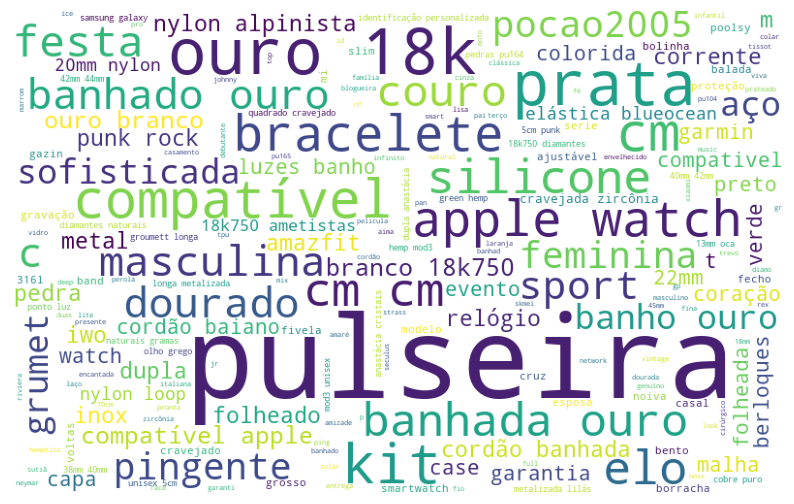

In [58]:
# Vamos Construir uma nuvem das palavras mais frequentes
nuvem_palavras = WordCloud(width=800, height=500,
                           background_color='white',
                           random_state=42).generate(" ".join(tokens_pulseiras))

plt.figure(figsize=(10,8))
plt.imshow(nuvem_palavras)
plt.axis("off")
plt.show()

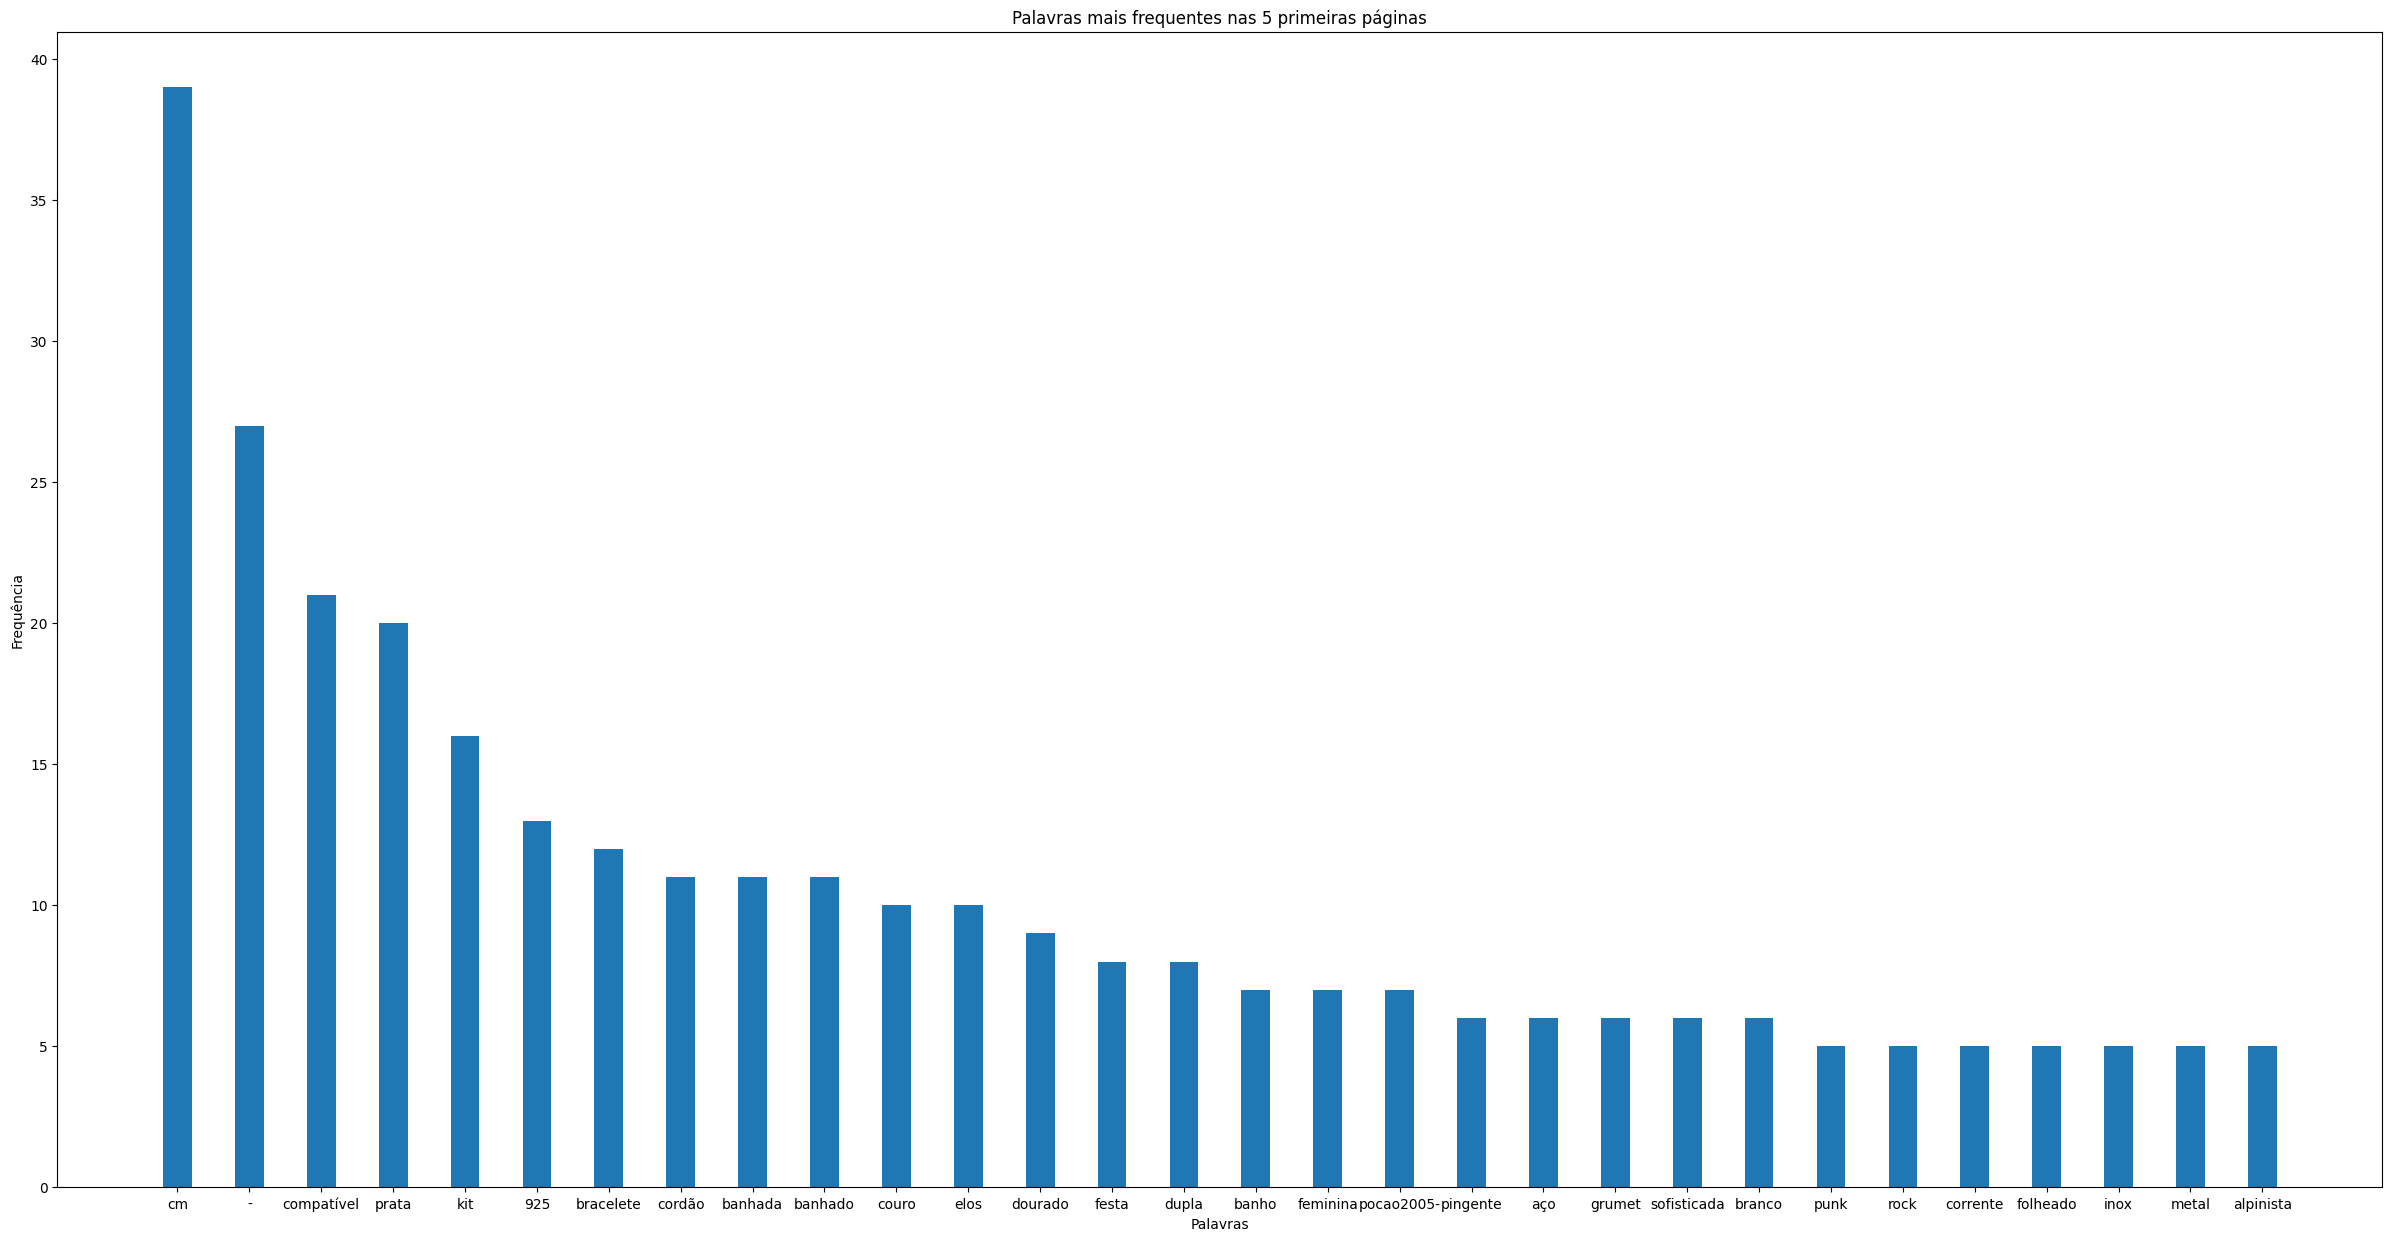

In [76]:
# Vamos construir um gráfico de barras com as 20 palavras mais pesquisadas

frequencia = Counter(tokens_pulseiras)
palavras_frequentes = frequencia.most_common(30)

plt.figure(figsize=(30, 15))
plt.bar([palavra[0] for palavra in palavras_frequentes], [palavra[1] for palavra in palavras_frequentes],
        width=0.4)
plt.title("Palavras mais frequentes nas 5 primeiras páginas")
plt.xlabel("Palavras")
plt.ylabel("Frequência")
plt.show()

In [ ]:
# Vamos retirar palavras que não possuem relação com bijuterias, moda feminina e palavras esperas na busca como 'pulseira'

stop_words = stopwords.words('portuguese')
stop_words.extend([
    'pulseira','pulseiras',
    '18','apple','watch','18k','ouro','nylon',
    'silicone','18k750','3','masculina',
    '20','relógio','m','20mm','sport','+','2'
    ])
tokens_pulseiras = [token.lower() for token in tokens_pulseiras if token.lower() not in stop_words]

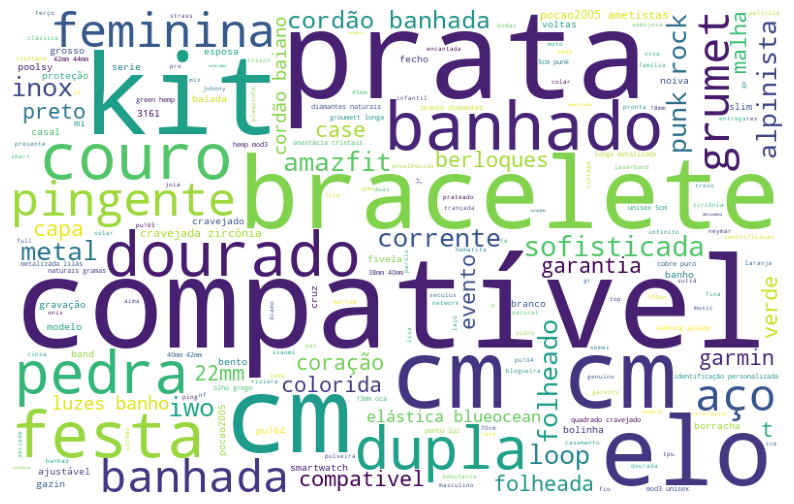

In [72]:
# Vamos refazer a nuvem de palavras

nuvem_palavras = WordCloud(width=800, height=500,
                           background_color='white',
                           random_state=42).generate(" ".join(tokens_pulseiras))

plt.figure(figsize=(10,8))
plt.imshow(nuvem_palavras)
plt.axis("off")
plt.show()

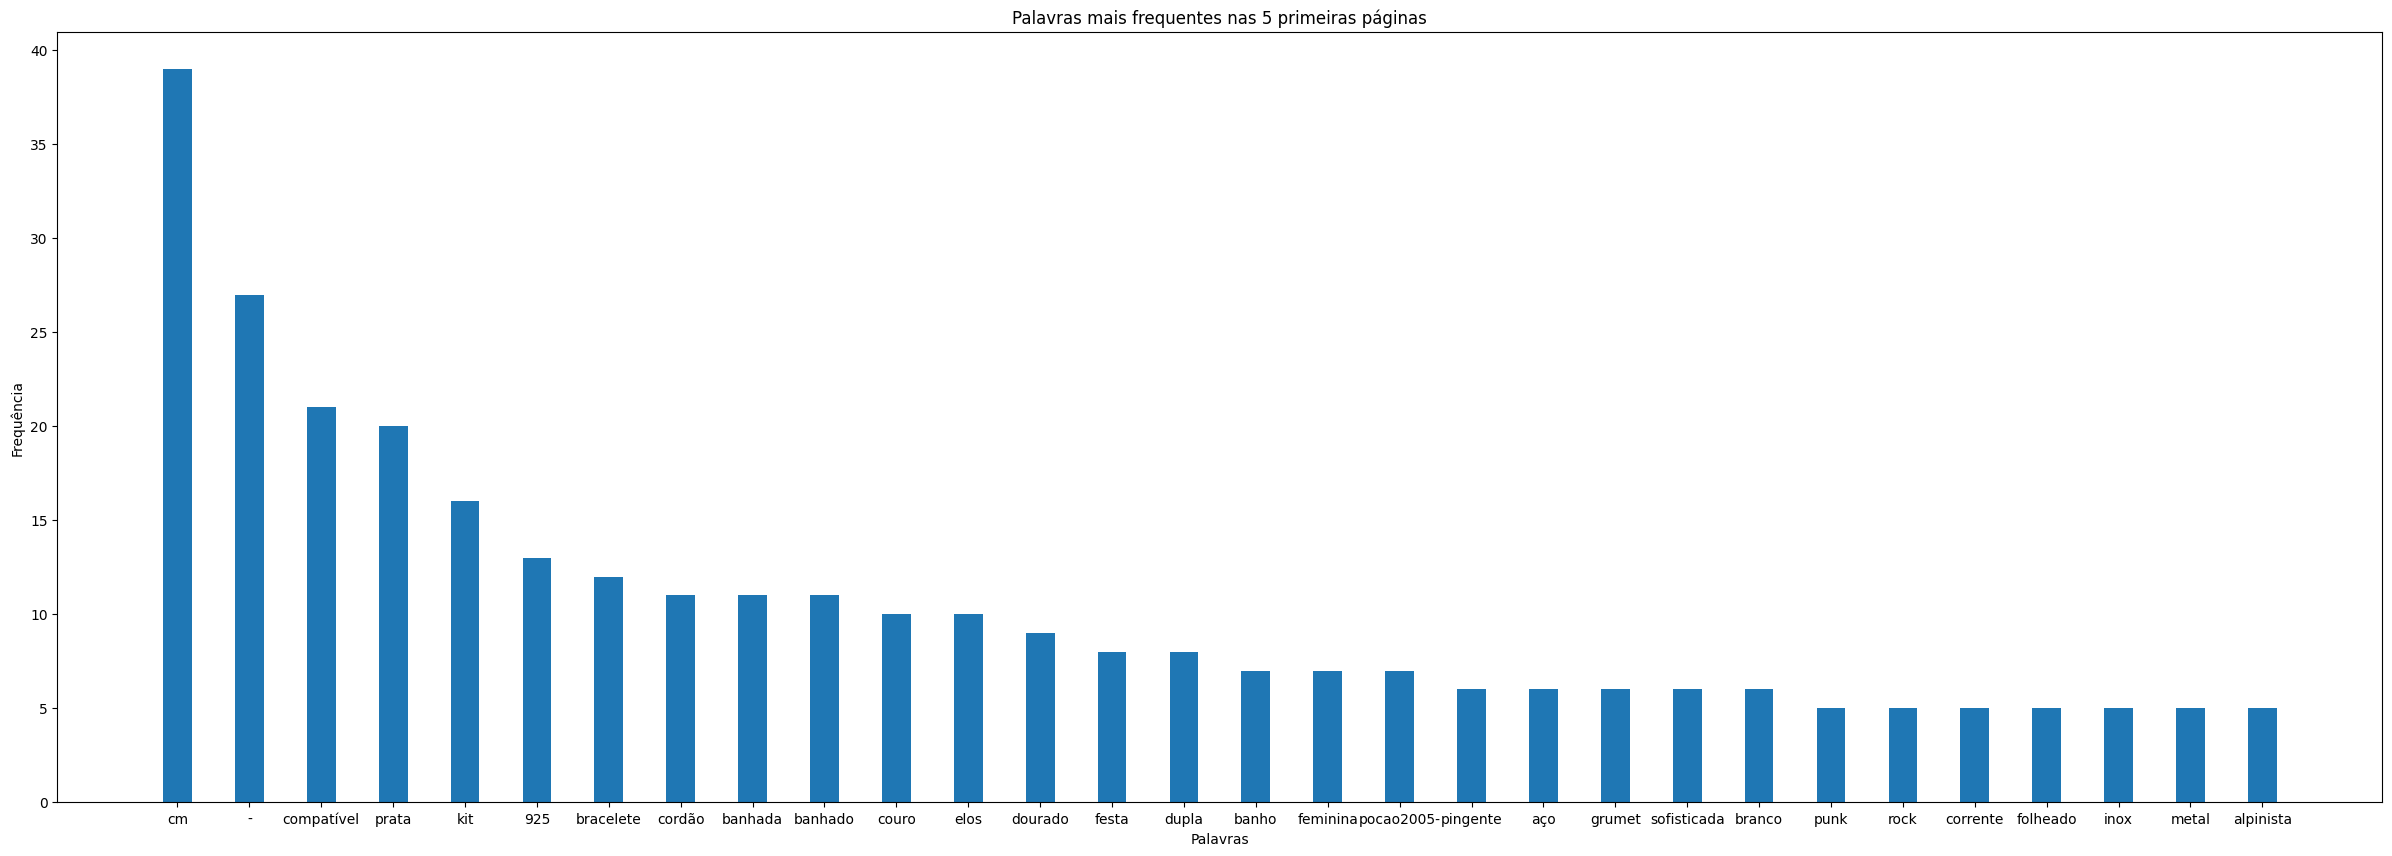

In [74]:
# Vamos refazer o gráfico de barras
frequencia = Counter(tokens_pulseiras)
palavras_frequentes = frequencia.most_common(30)
plt.figure(figsize=(30, 10))
plt.bar([palavra[0] for palavra in palavras_frequentes], [palavra[1] for palavra in palavras_frequentes],
        width=0.4)
plt.title("Palavras mais frequentes nas 5 primeiras páginas")
plt.xlabel("Palavras")
plt.ylabel("Frequência")
plt.show()

## 💡 Insights Estratégicos e Conclusões
**Resumo da Análise:** Com base na frequência de palavras dos anúncios na primeira página (Top Vendas), identificamos padrões claros que podem aumentar a conversão de novos anúncios.

### 1. ✍️ Otimização de Títulos
O algoritmo do Mercado Livre prioriza a densidade de informação em poucos caracteres.
* **Terminologia Específica:** No nicho de metais, a palavra `inox` é preferível a `inoxidável`. Além de ser mais buscada, é mais curta.
* **A Força da "Prata 925":** A combinação numérica `925` é um gatilho de qualidade forte. Anúncios que contêm apenas "Prata" sem a numeração tendem a ter menor relevância.

### 2. 📏 Especificações Técnicas
A conversão acontece no detalhe. O consumidor busca certeza sobre o que está comprando.
* **Medidas Explícitas:** A alta incidência de `cm` prova que colocar o tamanho da pulseira **diretamente no título** é crucial para o ranqueamento. Títulos genéricos perdem visibilidade.

### 3. 🎨 Tendências de Mercado
* **A "Cor" Dourada:** Para produtos dourados, a palavra `dourado` é obrigatória. Curiosamente, para produtos prateados, a palavra `prateado` quase não aparece — o próprio material ("Aço", "Prata") já define a cor na mente do consumidor.
* **Estratégia de Kits:** A análise sugere uma oportunidade em agrupar produtos (kits), o que aumenta o ticket médio e se destaca em meio a anúncios unitários.